In [36]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
Y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
Y = Y[random_index]
Y = Y.reshape([500,1])

In [33]:
print(X.shape)
print(y.shape)

(500, 2)
(500, 1)


# 設定

In [45]:
from sklearn.datasets import load_iris
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#アイリスデータのインポート退避
# iris_data = load_iris()
# X = iris_data.data
# Y = iris_data.target
# data_names = ['sepal_length','sepal_width','petal_length','petal_width']
# target_names = ['setosa', 'versicolor', 'virginica']
# #print(type(X))
# # print(type(target_names))

# df_X = pd.DataFrame(X,columns = data_names)
# df_Y = pd.DataFrame(Y,columns = ['Species'])

# X = df_X.values
# X = X[0:100]
# X = X[:,[2,3]]
# print(X.shape)

# Y = df_Y.values
# Y = Y[0:100]
# Y = np.where(Y>0,1,-1)
# print(Y.shape)

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375, 1)
(125, 1)


# 【問題1】ラグランジュの未定乗数法による最急降下

SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数λ
を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})$$

ここでk(xi,xj)はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、
この部分は独立したメソッドとしておきましょう。
$$k(x_i, x_j) = x_{i}^{T} x_j$$

In [77]:
# 初期値設定
np.random.seed(1) #本来は与えられるパラメータベクトル
lam = np.random.rand(X.shape[0]).reshape(X.shape[0],1)
#lam = np.random.rand(self.X.shape[0]).reshape(self.X.shape[0],1)
lr = 0.0001 #学習率

np.ones((X.shape[0],1))

# T = (lam.T)@((Y@Y.T)*(X@X.T))

lam = lam + lr*(np.ones((X.shape[0],1)) - ((lam.T)@((Y@Y.T)*(X@X.T))).T)
print(lam)

# print(lam.shape)
# print((np.ones((X.shape[0],1)).shape))
# print((Y@Y.T).shape)
# print((X@X.T).shape)
# print(T.shape)
# print(.shape)
# print(.shape)
# lam.shape

print(np.count_nonzero(lam > 0))

# カーネル計算
def karnel(X_test,X_train):
    k = X_test@X_train.T
    return k
karnel(X_test,X_train).shape
# (X@X.T).shape

[[ 2.97595099e-01]
 [ 6.32222503e-01]
 [-9.93575357e-02]
 [ 1.65346712e-01]
 [ 3.16132407e-02]
 [-2.44005254e-02]
 [ 8.02693366e-02]
 [ 2.46976902e-01]
 [ 2.70681235e-01]
 [ 4.04657494e-01]
 [ 3.02637067e-01]
 [ 5.60792137e-01]
 [ 5.53316614e-02]
 [ 7.88157161e-01]
 [-6.49279785e-02]
 [ 5.25581812e-01]
 [ 3.16760275e-01]
 [ 4.83781841e-01]
 [ 1.43347956e-02]
 [ 1.08280879e-01]
 [ 6.74626993e-01]
 [ 8.68150286e-01]
 [ 1.83924563e-01]
 [ 6.11902749e-01]
 [ 7.42635208e-01]
 [ 7.20842322e-01]
 [-2.00905026e-02]
 [-1.20811435e-01]
 [ 3.31403363e-02]
 [ 7.51986712e-01]
 [ 1.92351850e-02]
 [ 2.89348941e-01]
 [ 8.17051600e-01]
 [ 4.19003336e-01]
 [ 5.65748520e-01]
 [ 2.08842401e-01]
 [ 5.63978281e-01]
 [ 7.25102480e-01]
 [-1.04734163e-01]
 [ 5.89605005e-01]
 [ 8.62175253e-01]
 [ 6.23824250e-01]
 [ 1.66180535e-01]
 [ 6.62286655e-01]
 [-3.27775824e-02]
 [ 3.51702260e-01]
 [ 8.08027184e-01]
 [ 1.71540584e-01]
 [ 1.93041433e-01]
 [ 2.44305978e-02]
 [-9.83427262e-02]
 [ 5.50722939e-01]
 [ 9.9536501

(125, 375)

# 【問題2】サポートベクターの決定

計算したラグランジュ乗数λが設定した閾値より大きいサンプルをサポートベクターとして扱います。
推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。
閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習が
うまく行えているかを確認できます。

In [39]:
# 閾値
threshold = 0.001
for j in range(1000):
    lam = lam + lr*(np.ones((X.shape[0],1)) - ((lam.T)@((Y@Y.T)*(X@X.T))).T)
#     print(np.count_nonzero(lam > 0))
    for i in range(X.shape[0]):
        if lam[i] > threshold:
            lam[i] = lam[i]
        else:
            lam[i] = 0
        
print(np.count_nonzero(lam > 0))
# print(lam)


8


# 【問題3】推定

推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた f(x)の符号が分類結果です。
$$f(x) = \sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n)$$

In [57]:
# x(sn)
sn = np.where(lam>0,1,0)*X
# print(sn)

# print((lam*Y).T.shape)
(karnel(X_test,sn)).shape

fx = ((lam*Y).T)@((karnel(X_test,sn)).T)
fx

fx_pred = np.where(fx>=0,1,-1)


ans = fx_pred + y_test.T

ans
# print(lam)
# # karnel(X_val,sn)[0]
# y_val

array([[-2,  2,  2, -2, -2,  2,  2, -2, -2,  2, -2,  2, -2, -2, -2,  2,
         2,  2,  2,  2, -2, -2,  2,  2, -2,  2,  2,  2,  2, -2, -2,  2,
         2, -2,  2, -2,  2, -2, -2,  2, -2,  2, -2,  2, -2,  2, -2,  2,
        -2,  2, -2, -2, -2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -2,
         2, -2, -2, -2, -2,  2,  2,  2,  2,  2,  2, -2,  2, -2,  2, -2,
         2,  2,  2,  2,  2, -2, -2,  2,  2,  2, -2,  2, -2,  2, -2,  2,
         2,  2, -2,  2, -2,  2,  2,  2, -2,  2, -2,  2,  2,  2,  2, -2,
         2, -2,  2, -2,  2,  2, -2,  2,  2, -2, -2, -2, -2]])

# 【問題4】学習と推定

機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [183]:
class ScratchSVMClassifier():
    """

    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter=100, lr=0.0001, kernel='linear', threshold=1e-5, verbose=False, gamma=1, theta=0, d=1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta = theta
        self.d =d
        
    def fit(self, X, y, X_val=None, y_val=None):
        self.X = X
        self.Y = y
        np.random.seed(1) #本来は与えられるパラメータベクトル
        lam = []
        lam = np.random.rand(self.X.shape[0]).reshape(self.X.shape[0],1)        
        np.ones((self.X.shape[0],1))
        lam = lam + self.lr*(np.ones((self.X.shape[0],1)) - ((lam.T)@((self.Y@self.Y.T)*(self.X@self.X.T))).T)
        for j in range(1000):
            lam = lam + self.lr*(np.ones((self.X.shape[0],1)) - ((lam.T)@((self.Y@self.Y.T)*(self.X@self.X.T))).T)
        #     print(np.count_nonzero(lam > 0))
            for i in range(X.shape[0]):
                if lam[i] > self.threshold:
                    lam[i] = lam[i]
                else:
                    lam[i] = 0
        self.lam = lam
#         print(self.lam)
        self.sv_ind = []
        self.sv_ind = np.array(np.where(self.lam!=0))
        self.sv_ind = self.sv_ind[0]
        self.X_svn = self.X[self.sv_ind]
        self.X_svn = self.X_svn
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
    # カーネル計算
    def karnel(self,X,Y,kernel='linear'):
        k = X@Y.T
        return k
    
    def karnel(self,X,Y,kernel='polynomial'):
        k = self.gamma*(X@Y.T + self.theta)**self.d
        return k
        
        pass
    def predict(self, X):
        sn = np.where(self.lam>0,1,0)*self.X
        
        fx = ((self.lam*self.Y).T)@((self.karnel(X,sn)).T)
        fx_pred = np.where(fx>=0,1,-1)
        self.fx_pred = fx_pred
        pass
        return self.fx_pred

In [174]:
clf = ScratchSVMClassifier()
clf.fit(X, Y)
# print(X_train.shape)
y_p = clf.predict(X)
print(clf.X[0])
print(clf.sv_ind)
print(clf.lam.shape)
print(clf.X_svn)

[ 0.77238275 -2.29167329]
[162 182 189 251 382 466 477 497]
(500, 1)
[[-0.50179779  0.74466058]
 [ 1.28107479 -0.21320964]
 [ 1.24251698 -0.93666625]
 [-0.14205902  2.11124362]
 [ 2.0789714   0.06069619]
 [ 2.70709974  0.53019513]
 [-0.17684562  1.7631565 ]
 [ 0.31731679  2.22551981]]


学習結果1.0
解析結果1.0


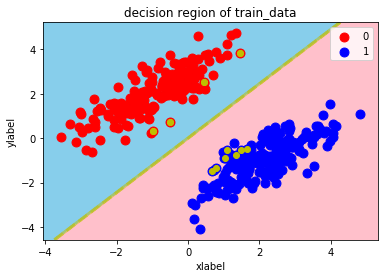

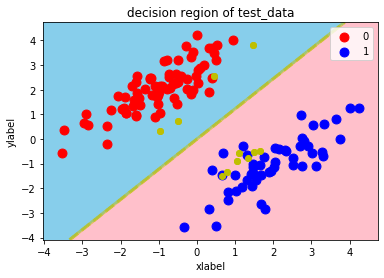

In [198]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf = ScratchSVMClassifier(kernel='linear', gamma = 5)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
y_pred_train1 = clf.predict(X_train)
# print(Y.shape)
# print(y_pred1.T.shape)
# print(y_pred_train1.T.shape)
# print(Y.shape)
# print(y_pred1.T.shape)

# print(X.shape)
# print(Y.shape)
# print(X.shape)
# print(y.shape)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train1.T)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred1.T)))
decision_region(X_train,list(itertools.chain.from_iterable(y_train)),clf,\
                title='decision region of train_data')
decision_region(X_test,list(itertools.chain.from_iterable(y_test)),clf,\
                title='decision region of test_data')

# 【問題5】決定領域の可視化

決定領域を可視化してください。
以下の例のようにサポートベクターは異なる色で示してください。

In [178]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import itertools

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),\
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i],\
                    label=target_names[i], marker='o')
        plt.scatter(clf.X_svn[:, 0], clf.X_svn[:, 1], color='y')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i])
for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

学習結果1.0
解析結果1.0


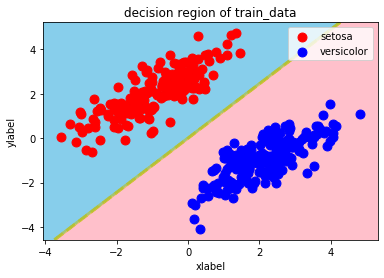

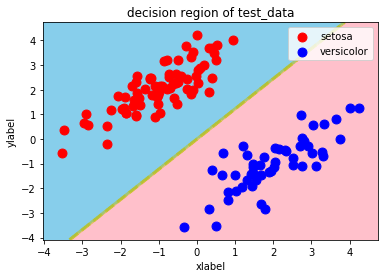

In [130]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf = ScratchSVMClassifier()
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
y_pred_train1 = clf.predict(X_train)
# print(y_train.shape)
# print(y_pred_train1.T.shape)
# print(y_test.shape)
# print(y_pred1.T.shape)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train1.T)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred1.T)))
decision_region(X_train,list(itertools.chain.from_iterable(y_train)),clf,\
                title='decision region of train_data')
decision_region(X_test,list(itertools.chain.from_iterable(y_test)),clf,\
                title='decision region of test_data')


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


学習結果1.0
解析結果1.0


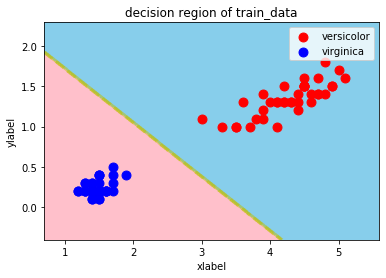

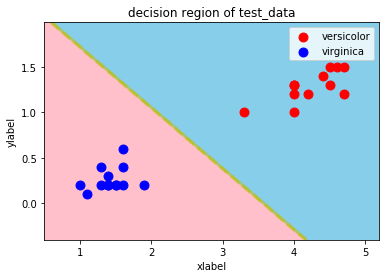

[[0.56336638 0.84186474]]
(75, 1)
(75,)
(25, 1)
(25,)
(75, 2)
(75, 1)
(25, 2)
(25, 1)


In [66]:
#SVM
from sklearn.svm import LinearSVC
from sklearn import metrics
clf2 = LinearSVC()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
y_pred_train = clf2.predict(X_train)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred)))
decision_region(X_train,list(itertools.chain.from_iterable(y_train)),clf2,\
                title='decision region of train_data')
decision_region(X_test,list(itertools.chain.from_iterable(y_test)),clf2,\
                title='decision region of test_data')
from sklearn.metrics import confusion_matrix
print(clf2.coef_)

print(y_train.shape)
print(y_pred_train.shape)
print(y_test.shape)
print(y_pred.shape)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)